In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def noise_pow(ω, ω_c, κ, r, g, Q, Δ, nc, nT):
    """
    function for calculating the noise power spectrum per equation 2 in Kurt's paper
    :param ω:      frequency offset from the cavity frequency
    :param ω_c:    frequency of the cavity
    :param κ:      output coupling rate of cavity
    :param r:      effective cooling rate term
    :param g:      collective interaction between spins and cavity
    :param Q:      quality factor of cavity
    :param Δ:      detuning
    :param nc:     number of photons in the cold spin ensemble
    :param nT:     number of photons in the thermal mode
    :returns:      the noise power at ω
    """
    a = nc - nT
    num = κ * r * g ** 2
    den_b = ((r ** 2 / 4) + ω ** 2) * ((κ + ω_c / Q) ** 2 / 4 + (ω - Δ) ** 2)
    den_c = (r * (κ + ω_c / Q) / 2 - 2 * ω * (ω - Δ))

    return nT + a * num / (den_b + g ** 2 * den_c + g ** 4)

In [3]:
# Define parameters - just use dummy ones for now
κ = 5e6                                                                  # output coupling rate of the cavity
r = np.linspace(0.1e6, 1e6, 1000)                           # effective cooling rate term
g = r                                                                    # collective interaction rate b/w cavity and spins
ω = np.linspace(0.1, 10, 100)                                            # RWA frequency in GHz
ωc = 2.87 * 2 * np.pi * 1e9                                              # mode frequency in Hz
Δ = 0                                                                   # cavity-spin detuning
Q = np.linspace(0.1e5, 1e5, 1000)
γ = ωc / Q                                                               # internal loss rate of cavity
T = 300                                                                   # room temperature in K
P = 0.8                                                                  # polarization of spin bath
hbar_ov_k = 7.639e-12                                                    # units are s * K

In [4]:
# Calculate room temperature number of photons
nT = (np.exp(hbar_ov_k * ωc * 2 * np.pi / T) - 1) ** -1

In [5]:
# Calculate the cold spin bath photon number
nc = 0.5 * (1 - P) / P

In [6]:
# Need to create mesh grid of g and q values
Qm, gm = np.meshgrid(Q, g)

In [7]:
# Calculate noise power spectrum
NP = noise_pow(0, ωc, κ, gm, gm, Qm, Δ, nc, nT)

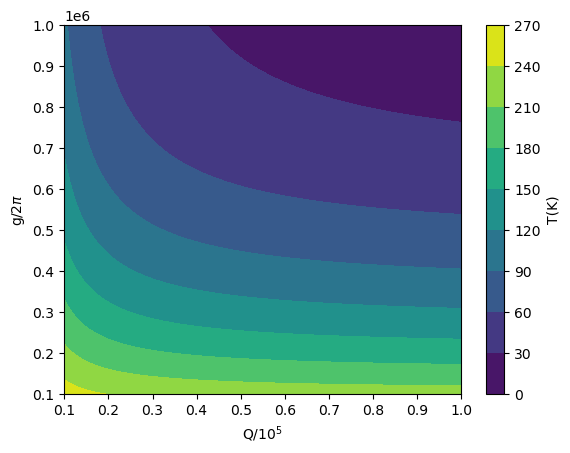

In [8]:
plt.contourf(Qm, gm, NP / nT * T)
plt.xticks([i * 1e4 for i in range(1, 11)], [f'{0.1*i:.1f}' for i in range(1, 11)])
plt.xlabel("Q/$10^5$")
plt.ylabel("g/2$\pi$")
plt.colorbar(label='T(K)')